In [ ]:
# Yahoo finance web scrapping
# Trending (Stock) Tickers

In [ ]:
pip install requests bs4

In [ ]:
pip install pandas

In [ ]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:00:00


In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd


In [ ]:
pip install yfinance

In [2]:
import re
import json
import csv

In [3]:
page = requests.get('https://finance.yahoo.com/trending-tickers/')

In [4]:
page.status_code

200

In [5]:
page.text

'<!doctype html><html data-color-theme="light" id="atomic" class="NoJs chrome desktop failsafe" lang="en-US"><head prefix="og: https://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark(\'PageStart\');</script><meta charset="utf-8"><title>Trending Stocks Today - Yahoo Finance</title><meta name="keywords" content="trending tickers, popular tickers, trending, popular, now, most popular, people"><meta http-equiv="x-dns-prefetch-control" content="on"><meta property="twitter:dnt" content="on"><meta property="fb:app_id" content="458584288257241"><meta name="theme-color" content="#037B66"><meta name="viewport" content="width=device-width, initial-scale=1"><meta name="description" lang="en-US" content="See the list of trending stocks today, including share price change and percentage, trading volume, intraday highs and lows, and day charts."><meta name="oath:guce:consent-host" content="guce.yahoo.com"><meta name="msvalidate.01" content="A9862C0E6E1BE95

In [6]:
# convert to a beautiful soup object

soup = bs(page.content)
soup

# print out html

contents = soup.prettify()
print(contents)

<!DOCTYPE html>
<html class="NoJs chrome desktop failsafe" data-color-theme="light" id="atomic" lang="en-US">
 <head prefix="og: https://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   Trending Stocks Today - Yahoo Finance
  </title>
  <meta content="trending tickers, popular tickers, trending, popular, now, most popular, people" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="458584288257241" property="fb:app_id"/>
  <meta content="#037B66" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="See the list of trending stocks today, including share price change and percentage, trading volume, intraday highs and lows, and day charts." lang="en-US" name="description"/>
  <meta content="guce.yahoo.com" name="oath:guce:consent-ho

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html class="NoJs chrome desktop failsafe" data-color-theme="light" id="atomic" lang="en-US">
 <head prefix="og: https://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   Trending Stocks Today - Yahoo Finance
  </title>
  <meta content="trending tickers, popular tickers, trending, popular, now, most popular, people" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="458584288257241" property="fb:app_id"/>
  <meta content="#037B66" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="See the list of trending stocks today, including share price change and percentage, trading volume, intraday highs and lows, and day charts." lang="en-US" name="description"/>
  <meta content="guce.yahoo.com" name="oath:guce:consent-ho

In [7]:
table = soup.find(class_ = "Pos(r) Maw($newGridWidth) Miw(a)!--tab768 Miw(a)!--tab1024 Miw(a)!--mobp Miw(a)!--mobl Miw(a)!--mobxl Bxz(bb) Mx(a) Pstart(20px)")

In [ ]:
print(table)

<div class="Pos(r) Maw($newGridWidth) Miw(a)!--tab768 Miw(a)!--tab1024 Miw(a)!--mobp Miw(a)!--mobl Miw(a)!--mobxl Bxz(bb) Mx(a) Pstart(20px)"><div class="Pos(r) D(ib) Pb(20px)"><div class="M(0) O(n):f D(ib) Bdrs(3px) C($tertiaryColor) Fz(s) Pos(r)" data-test="dropdown"><div aria-label="" class="Pos(r) D(ib) Cur(p)" role="button" tabindex="0" title=""><div class="Cur(p)" data-test="watchlist-name"><h1 class="D(ib) Va(m) C($primaryColor) Fz(l)">Trending Tickers</h1><svg class="Mstart(5px) Va(m)! Fill($iconColor) Stk($iconColor) Cur(p)" data-icon="caret-down" height="18" style="stroke-width:0;vertical-align:bottom" viewbox="0 0 48 48" width="18"><path d="M24.21 33.173l12.727-12.728c.78-.78.78-2.048 0-2.828-.78-.78-2.047-.78-2.828 0l-9.9 9.9-9.9-9.9c-.78-.78-2.047-.78-2.827 0-.78.78-.78 2.047 0 2.828L24.21 33.173z"></path></svg></div></div></div></div></div>


In [8]:
soup.find(id = "yfin-list")

<section aria-label="YFin List" data-test="yfin-list-table" data-yaft-module="tdv2-applet-YFinListTable" id="yfin-list"><div class="Pos(r) Maw($newGridWidth) Miw(a)!--tab768 Miw(a)!--tab1024 Miw(a)!--mobp Miw(a)!--mobl Miw(a)!--mobxl Bxz(bb) Mx(a) Pstart(20px)"><div class="Pos(r) D(ib) Pb(20px)"><div class="M(0) O(n):f D(ib) Bdrs(3px) C($tertiaryColor) Fz(s) Pos(r)" data-test="dropdown"><div aria-label="" class="Pos(r) D(ib) Cur(p)" role="button" tabindex="0" title=""><div class="Cur(p)" data-test="watchlist-name"><h1 class="D(ib) Va(m) C($primaryColor) Fz(l)">Trending Tickers</h1><svg class="Mstart(5px) Va(m)! Fill($iconColor) Stk($iconColor) Cur(p)" data-icon="caret-down" height="18" style="stroke-width:0;vertical-align:bottom" viewbox="0 0 48 48" width="18"><path d="M24.21 33.173l12.727-12.728c.78-.78.78-2.048 0-2.828-.78-.78-2.047-.78-2.828 0l-9.9 9.9-9.9-9.9c-.78-.78-2.047-.78-2.827 0-.78.78-.78 2.047 0 2.828L24.21 33.173z"></path></svg></div></div></div></div></div><div class="Po

In [9]:
table1 = soup.find(class_ = "Ovx(a) Ovx(h)--print Ovy(h) W(100%)")
table1

<div class="Ovx(a) Ovx(h)--print Ovy(h) W(100%)"><table class="W(100%)"><thead><tr class="C($tertiaryColor) BdB Bdbc($seperatorColor)"><th class="Ta(start) Pstart(6px) Pend(15px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h C($primaryColor) Fw(500) Ta(start) Start(0) Pend(10px) Pos(st) Bgc($lv3BgColor) Z(1) Ta(start)!">Symbol<div class="W(3px) Pend(5px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n)"></div></th><th class="Ta(start) Px(10px) Miw(180px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h Fw(400)!">Name</th><th class="Ta(end) Pstart(20px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h Fw(400)!">Last Price</th><th class="Ta(end) Pstart(20px) Miw(90px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h Fw(400)!">Market Time</th><th class="Ta(end) Pstart(20px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h Fw(400)!">Change</th><th class="Ta(end) Pstart(20px) Fz

In [ ]:
#tablee = soup.table1

In [10]:
columns = soup.find_all('th')
columns

[<th class="Ta(start) Pstart(6px) Pend(15px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h C($primaryColor) Fw(500) Ta(start) Start(0) Pend(10px) Pos(st) Bgc($lv3BgColor) Z(1) Ta(start)!">Symbol<div class="W(3px) Pend(5px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n)"></div></th>,
 <th class="Ta(start) Px(10px) Miw(180px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h Fw(400)!">Name</th>,
 <th class="Ta(end) Pstart(20px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h Fw(400)!">Last Price</th>,
 <th class="Ta(end) Pstart(20px) Miw(90px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h Fw(400)!">Market Time</th>,
 <th class="Ta(end) Pstart(20px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h Fw(400)!">Change</th>,
 <th class="Ta(end) Pstart(20px) Fz(xs) Py(5px)! Bgc($lv3BgColor) Va(m) Cur(p) Bgc($hoverBgColor):h Fw(400)!">% Change</th>,
 <th class="Ta(end) Pstart(20

In [11]:
names_of_columns = [c.string for c in columns]
names_of_columns

[None,
 'Name',
 'Last Price',
 'Market Time',
 'Change',
 '% Change',
 'Volume',
 'Market Cap',
 'Intraday High/Low',
 '52 Week Range',
 'Day Chart']

In [12]:
rows = soup.find('tbody').find_all("tr")
rows

[<tr class="simpTblRow Bgc($hoverBgColor):h BdB Bdbc($seperatorColor) Bdbc($tableBorderBlue):h H(32px) Bgc($lv2BgColor)"><td aria-label="Symbol" class="Va(m) Ta(start) Pstart(6px) Pend(15px) Start(0) Pend(10px) simpTblRow:h_Bgc($hoverBgColor) Pos(st) Bgc($lv3BgColor) Z(1) Bgc($lv2BgColor) Ta(start)! Fz(s)" colspan=""><a class="Fw(600) C($linkColor)" data-test="quoteLink" href="/quote/TSLA" title="Tesla, Inc.">TSLA</a><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)"></div></td><td aria-label="Name" class="Va(m) Ta(start) Px(10px) Miw(180px) Fz(s)" colspan="">Tesla, Inc.</td><td aria-label="Last Price" class="Va(m) Ta(end) Pstart(20px) Fw(600) Fz(s)" colspan=""><fin-streamer class="" data-field="regularMarketPrice" data-pricehint="2" data-symbol="TSLA" data-test="colorChange" data-trend="none" value="185.9501">185.95</fin-streamer></td><td aria-label="Market Time" class="Va(m) Ta(end) Pstart(20px) Miw(90px) Fz(s)" colspan=""><fin-streame

In [ ]:
# Scraped data to dataframe

In [18]:
rows = soup.find('tbody').find_all('tr')
dataset = []
for tr in rows:
  td = tr.find_all('td')
  row = [str(tr.get_text()).strip()for tr in td]
  dataset.append(row)

trending_tickers = pd.DataFrame(dataset, columns = names_of_columns)
trending_tickers

None                                   Name Last Price Market Time  \
0      TSLA                            Tesla, Inc.     185.95  2:59PM EDT   
1   ETH-USD                           Ethereum USD   3,726.84  6:57PM UTC   
2       DJT   Trump Media & Technology Group Corp.      43.78  2:59PM EDT   
3      XPEV                             XPeng Inc.       8.82  2:59PM EDT   
4      PANW               Palo Alto Networks, Inc.     313.64  2:59PM EDT   
5       WBA         Walgreens Boots Alliance, Inc.      16.68  2:59PM EDT   
6      MGOL                       MGO Global, Inc.     1.0500  2:59PM EDT   
7      FSLR                      First Solar, Inc.     208.96  2:59PM EDT   
8      BDRX            Biodexa Pharmaceuticals Plc     2.2599  2:59PM EDT   
9      MGRX                   Mangoceuticals, Inc.     0.5998  2:59PM EDT   
10      GLW                   Corning Incorporated      36.67  2:59PM EDT   
11     ETHE         Grayscale Ethereum Trust (ETH)      33.03  2:44PM EDT   
12     MMAT                    Meta Materials Inc.     3.1400  2:59PM EDT   
13     BNED         Barnes & Noble Education, Inc.     0.5400  2:59PM EDT   
14      LOW                 Lowe's Companies, Inc.     223.48  2:59PM EDT   
15     PTON              Peloton Interactive, Inc.     3.3550  2:59PM EDT   
16     CTNT  Cheetah Net Supply Chain Service Inc.     1.2299  2:59PM EDT   
17     LRCX               Lam Research Corporation     961.27  2:59PM EDT   
18      LLY                  Eli Lilly and Company     804.22  2:59PM EDT   
19    SU.TO                     Suncor Energy Inc.      55.92  2:59PM EDT   
20       BE               Bloom Energy Corporation      14.97  2:59PM EDT   
21       MS                         Morgan Stanley     101.62  2:59PM EDT   
22     MSFT                  Microsoft Corporation     429.05  2:59PM EDT   
23    FLT.V            Drone Delivery Canada Corp.     0.2500  2:52PM EDT   
24    TD.TO              The Toronto-Dominion Bank      77.44  2:59PM EDT   
25      BMY           Bristol-Myers Squibb Company      42.44  2:59PM EDT   
26  SHOP.TO                           Shopify Inc.      78.27  2:59PM EDT   
27  LSPD.TO               Lightspeed Commerce Inc.      19.85  2:59PM EDT   
28     POWL                Powell Industries, Inc.     187.20  2:59PM EDT   
29     BRLS                    Borealis Foods Inc.       6.65  2:59PM EDT   

      Change  % Change    Volume Market Cap Intraday High/Low 52 Week Range  \
0     +11.00    +6.29%   90.442M   593.032B                                   
1    +575.60   +18.27%   51.818B   447.695B                                   
2      -4.60    -9.50%    3.372M     5.985B                                   
3      +0.54    +6.52%   56.183M     8.821B                                   
4     -10.13    -3.13%   11.266M   101.337B                                   
5      -1.14    -6.37%     16.5M    14.394B                                   
6    +0.8213  +359.12%  296.205M    17.223M                                   
7     +12.62    +6.43%    2.809M    22.367B                                   
8    +0.9899   +77.94%  119.079M      9.91M                                   
9    +0.3468  +137.08%  227.026M    14.887M                                   
10     +1.15    +3.25%    7.021M    31.417B                                   
11     +4.32   +15.05%   18.737M        N/A                                   
12   +0.8400   +36.38%   39.851M    21.024M                                   
13   +0.2300   +74.19%  175.043M    28.704M                                   
14     -5.69    -2.48%    3.877M   127.873B                                   
15   -0.5550   -14.19%   46.213M     1.244B                                   
16  -13.5301   -91.67%   50.386M    39.847M                                   
17    +19.23    +2.04%   843,624   125.678B                                   
18    +21.04    +2.69%    2.976M    764.33B                                   
19     +1.35    +2.47%    3.172M    71.

In [19]:
trending_tickers.columns

Index([               None,              'Name',        'Last Price',
             'Market Time',            'Change',          '% Change',
                  'Volume',        'Market Cap', 'Intraday High/Low',
           '52 Week Range',         'Day Chart'],
      dtype='object')

In [ ]:
# Data cleaning and processing

In [20]:
trending_tickers.drop(['Intraday High/Low', '52 Week Range', 'Day Chart'], axis = 1, inplace = True)

In [21]:
trending_tickers.columns.values[0] = 'Symbol'

In [22]:
trending_tickers.rename(columns = {'None': 'Symbol', 'Name': 'Name', 'Last Price': 'Last Price', 'Market Time': 'Market Time', 'Change': 'Change', '% Change': '% Change', 'Volume': 'Volume', 'Market Cap': 'Market Cap'}, inplace = True)

In [23]:
trending_tickers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Symbol       30 non-null     object
 1   Name         30 non-null     object
 2   Last Price   30 non-null     object
 3   Market Time  30 non-null     object
 4   Change       30 non-null     object
 5   % Change     30 non-null     object
 6   Volume       30 non-null     object
 7   Market Cap   30 non-null     object
dtypes: object(8)
memory usage: 2.0+ KB


In [24]:
trending_tickers['Last Price']= trending_tickers['Last Price'].str.replace(',','')
trending_tickers['Last Price'] = trending_tickers['Last Price'].astype(float)

In [25]:
trending_tickers['Change']= trending_tickers['Change'].str.replace(',','')
trending_tickers['Change'] = trending_tickers['Change'].astype(float)

In [26]:
trending_tickers['% Change']= trending_tickers['% Change'].apply(str).str.replace('%', '')

In [27]:
trending_tickers['% Change'] = trending_tickers['% Change'].astype(float)

In [28]:
print(trending_tickers['% Change'].dtype)

float64


In [29]:
trending_tickers.dtypes

Symbol          object
Name            object
Last Price     float64
Market Time     object
Change         float64
% Change       float64
Volume          object
Market Cap      object
dtype: object

In [31]:
trending_tickers.describe()

Last Price      Change   % Change
count    30.000000   30.000000   30.00000
mean    252.972487   21.410263   24.54300
std     695.273572  104.969403   73.74388
min       0.250000  -13.530100  -91.67000
25%       4.178750   -0.828750   -2.01000
50%      39.555000    0.830650    2.97000
75%     186.887500    3.445000   17.66250
max    3726.840000  575.600000  359.12000

In [32]:
# Removing null values

trending_tickers.dropna(axis = 0)

Symbol                                   Name  Last Price Market Time  \
0      TSLA                            Tesla, Inc.    185.9500  2:59PM EDT   
1   ETH-USD                           Ethereum USD   3726.8400  6:57PM UTC   
2       DJT   Trump Media & Technology Group Corp.     43.7800  2:59PM EDT   
3      XPEV                             XPeng Inc.      8.8200  2:59PM EDT   
4      PANW               Palo Alto Networks, Inc.    313.6400  2:59PM EDT   
5       WBA         Walgreens Boots Alliance, Inc.     16.6800  2:59PM EDT   
6      MGOL                       MGO Global, Inc.      1.0500  2:59PM EDT   
7      FSLR                      First Solar, Inc.    208.9600  2:59PM EDT   
8      BDRX            Biodexa Pharmaceuticals Plc      2.2599  2:59PM EDT   
9      MGRX                   Mangoceuticals, Inc.      0.5998  2:59PM EDT   
10      GLW                   Corning Incorporated     36.6700  2:59PM EDT   
11     ETHE         Grayscale Ethereum Trust (ETH)     33.0300  2:44PM EDT   
12     MMAT                    Meta Materials Inc.      3.1400  2:59PM EDT   
13     BNED         Barnes & Noble Education, Inc.      0.5400  2:59PM EDT   
14      LOW                 Lowe's Companies, Inc.    223.4800  2:59PM EDT   
15     PTON              Peloton Interactive, Inc.      3.3550  2:59PM EDT   
16     CTNT  Cheetah Net Supply Chain Service Inc.      1.2299  2:59PM EDT   
17     LRCX               Lam Research Corporation    961.2700  2:59PM EDT   
18      LLY                  Eli Lilly and Company    804.2200  2:59PM EDT   
19    SU.TO                     Suncor Energy Inc.     55.9200  2:59PM EDT   
20       BE               Bloom Energy Corporation     14.9700  2:59PM EDT   
21       MS                         Morgan Stanley    101.6200  2:59PM EDT   
22     MSFT                  Microsoft Corporation    429.0500  2:59PM EDT   
23    FLT.V            Drone Delivery Canada Corp.      0.2500  2:52PM EDT   
24    TD.TO              The Toronto-Dominion Bank     77.4400  2:59PM EDT   
25      BMY           Bristol-Myers Squibb Company     42.4400  2:59PM EDT   
26  SHOP.TO                           Shopify Inc.     78.2700  2:59PM EDT   
27  LSPD.TO               Lightspeed Commerce Inc.     19.8500  2:59PM EDT   
28     POWL                Powell Industries, Inc.    187.2000  2:59PM EDT   
29     BRLS                    Borealis Foods Inc.      6.6500  2:59PM EDT   

      Change  % Change    Volume Market Cap  
0    11.0000      6.29   90.442M   593.032B  
1   575.6000     18.27   51.818B   447.695B  
2    -4.6000     -9.50    3.372M     5.985B  
3     0.5400      6.52   56.183M     8.821B  
4   -10.1300     -3.13   11.266M   101.337B  
5    -1.1400     -6.37     16.5M    14.394B  
6     0.8213    359.12  296.205M    17.223M  
7    12.6200      6.43    2.809M    22.367B  
8     0.9899     77.94  119.079M      9.91M  
9     0.3468    137.08  227.026M    14.887M  
10    1.1500      3.25    7.021M    31.417B  
11    4.3200     15.05   18.737M        N/A  
12    0.8400     36.38   39.851M    21.024M  
13    0.2300     74.19  175.043M    28.704M  
14   -5.6900     -2.48    3.877M   127.873B  
15   -0.5550    -14.19   46.213M     1.244B  
16  -13.5301    -91.67   50.386M    39.847M  
17   19.2300      2.04   843,624   125.678B  
18   21.0400      2.69    2.976M    764.33B  
19    1.3500      2.47    3.172M    71.852B  
20    2.0500     15.84   11.245M     3.397B  
21    1.2900      1.29    5.391M   165.149B  
22    3.7100      0.87   13.119M     3.189T  
23    0.0550     28.21    1.098M     56.05M  
24   -0.5100     -0.65    1.613M   136.933B  
25   -0.9200     -2.11   10.176M     86.04B  
26   -1.3600     -1.71   818,221   101.529B  
27   -1.1400     -5.43   844,498     3.048B  
28   22.0500     13.35   549,617     2.244B  
29    2.6500     66.25    3.804M   142.168M

In [33]:
# Saving scraped data as csv file

In [34]:
trending_tickers.to_csv(r'C:\Users\ADONAI-MKSHALOM\Desktop\trending_stock.csv', index = False,)

In [35]:
trending_stocks = pd.read_csv(r'C:\Users\ADONAI-MKSHALOM\Desktop\trending_stock.csv')

trending_stocks

Symbol                                   Name  Last Price Market Time  \
0      TSLA                            Tesla, Inc.    185.9500  2:59PM EDT   
1   ETH-USD                           Ethereum USD   3726.8400  6:57PM UTC   
2       DJT   Trump Media & Technology Group Corp.     43.7800  2:59PM EDT   
3      XPEV                             XPeng Inc.      8.8200  2:59PM EDT   
4      PANW               Palo Alto Networks, Inc.    313.6400  2:59PM EDT   
5       WBA         Walgreens Boots Alliance, Inc.     16.6800  2:59PM EDT   
6      MGOL                       MGO Global, Inc.      1.0500  2:59PM EDT   
7      FSLR                      First Solar, Inc.    208.9600  2:59PM EDT   
8      BDRX            Biodexa Pharmaceuticals Plc      2.2599  2:59PM EDT   
9      MGRX                   Mangoceuticals, Inc.      0.5998  2:59PM EDT   
10      GLW                   Corning Incorporated     36.6700  2:59PM EDT   
11     ETHE         Grayscale Ethereum Trust (ETH)     33.0300  2:44PM EDT   
12     MMAT                    Meta Materials Inc.      3.1400  2:59PM EDT   
13     BNED         Barnes & Noble Education, Inc.      0.5400  2:59PM EDT   
14      LOW                 Lowe's Companies, Inc.    223.4800  2:59PM EDT   
15     PTON              Peloton Interactive, Inc.      3.3550  2:59PM EDT   
16     CTNT  Cheetah Net Supply Chain Service Inc.      1.2299  2:59PM EDT   
17     LRCX               Lam Research Corporation    961.2700  2:59PM EDT   
18      LLY                  Eli Lilly and Company    804.2200  2:59PM EDT   
19    SU.TO                     Suncor Energy Inc.     55.9200  2:59PM EDT   
20       BE               Bloom Energy Corporation     14.9700  2:59PM EDT   
21       MS                         Morgan Stanley    101.6200  2:59PM EDT   
22     MSFT                  Microsoft Corporation    429.0500  2:59PM EDT   
23    FLT.V            Drone Delivery Canada Corp.      0.2500  2:52PM EDT   
24    TD.TO              The Toronto-Dominion Bank     77.4400  2:59PM EDT   
25      BMY           Bristol-Myers Squibb Company     42.4400  2:59PM EDT   
26  SHOP.TO                           Shopify Inc.     78.2700  2:59PM EDT   
27  LSPD.TO               Lightspeed Commerce Inc.     19.8500  2:59PM EDT   
28     POWL                Powell Industries, Inc.    187.2000  2:59PM EDT   
29     BRLS                    Borealis Foods Inc.      6.6500  2:59PM EDT   

      Change  % Change    Volume Market Cap  
0    11.0000      6.29   90.442M   593.032B  
1   575.6000     18.27   51.818B   447.695B  
2    -4.6000     -9.50    3.372M     5.985B  
3     0.5400      6.52   56.183M     8.821B  
4   -10.1300     -3.13   11.266M   101.337B  
5    -1.1400     -6.37     16.5M    14.394B  
6     0.8213    359.12  296.205M    17.223M  
7    12.6200      6.43    2.809M    22.367B  
8     0.9899     77.94  119.079M      9.91M  
9     0.3468    137.08  227.026M    14.887M  
10    1.1500      3.25    7.021M    31.417B  
11    4.3200     15.05   18.737M        NaN  
12    0.8400     36.38   39.851M    21.024M  
13    0.2300     74.19  175.043M    28.704M  
14   -5.6900     -2.48    3.877M   127.873B  
15   -0.5550    -14.19   46.213M     1.244B  
16  -13.5301    -91.67   50.386M    39.847M  
17   19.2300      2.04   843,624   125.678B  
18   21.0400      2.69    2.976M    764.33B  
19    1.3500      2.47    3.172M    71.852B  
20    2.0500     15.84   11.245M     3.397B  
21    1.2900      1.29    5.391M   165.149B  
22    3.7100      0.87   13.119M     3.189T  
23    0.0550     28.21    1.098M     56.05M  
24   -0.5100     -0.65    1.613M   136.933B  
25   -0.9200     -2.11   10.176M     86.04B  
26   -1.3600     -1.71   818,221   101.529B  
27   -1.1400     -5.43   844,498     3.048B  
28   22.0500     13.35   549,617     2.244B  
29    2.6500     66.25    3.804M   142.168M

In [36]:
trending_stocks.head()

Symbol                                  Name  Last Price Market Time  \
0     TSLA                           Tesla, Inc.      185.95  2:59PM EDT   
1  ETH-USD                          Ethereum USD     3726.84  6:57PM UTC   
2      DJT  Trump Media & Technology Group Corp.       43.78  2:59PM EDT   
3     XPEV                            XPeng Inc.        8.82  2:59PM EDT   
4     PANW              Palo Alto Networks, Inc.      313.64  2:59PM EDT   

   Change  % Change   Volume Market Cap  
0   11.00      6.29  90.442M   593.032B  
1  575.60     18.27  51.818B   447.695B  
2   -4.60     -9.50   3.372M     5.985B  
3    0.54      6.52  56.183M     8.821B  
4  -10.13     -3.13  11.266M   101.337B

In [37]:
trending_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       30 non-null     object 
 1   Name         30 non-null     object 
 2   Last Price   30 non-null     float64
 3   Market Time  30 non-null     object 
 4   Change       30 non-null     float64
 5   % Change     30 non-null     float64
 6   Volume       30 non-null     object 
 7   Market Cap   29 non-null     object 
dtypes: float64(3), object(5)
memory usage: 2.0+ KB


In [ ]:
#Data exploration and analysis

In [54]:
# Lowest trending stock price

lowest_trending_stock_price = trending_stocks['Last Price'].min()
lowest_trending_stock_price

0.25

In [55]:
# Maximum trending stock price

max_trending_stock_price = trending_stocks['Last Price'].max()
max_trending_stock_price

3726.84

In [56]:
# Top 5 highest trending stock

top_five = trending_stocks[['Symbol', 'Name', 'Last Price']].sort_values(by = 'Last Price', ascending = False)
top_five.head(5)

Symbol                      Name  Last Price
1   ETH-USD              Ethereum USD     3726.84
17     LRCX  Lam Research Corporation      961.27
18      LLY     Eli Lilly and Company      804.22
22     MSFT     Microsoft Corporation      429.05
4      PANW  Palo Alto Networks, Inc.      313.64

In [ ]:
# Visualization of the graph

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

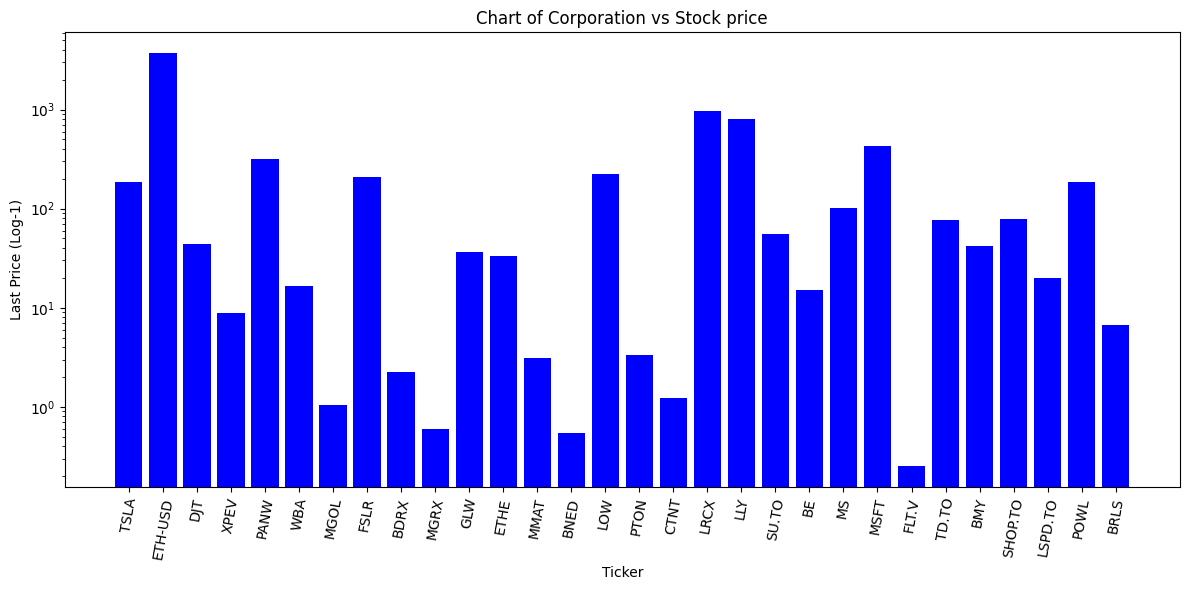

In [58]:
plt.figure(figsize=(12, 6))
plt.bar(trending_stocks['Symbol'], trending_stocks['Last Price'], log=True, color = 'Blue')
plt.xlabel('Ticker')
plt.ylabel(('Last Price (Log-1)'))
plt.title('Chart of Corporation vs Stock price')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [ ]:
#price_change = trending_stocks[['Symbol', 'Name', 'Last Price', 'Change']].sort_values(by = 'Change')

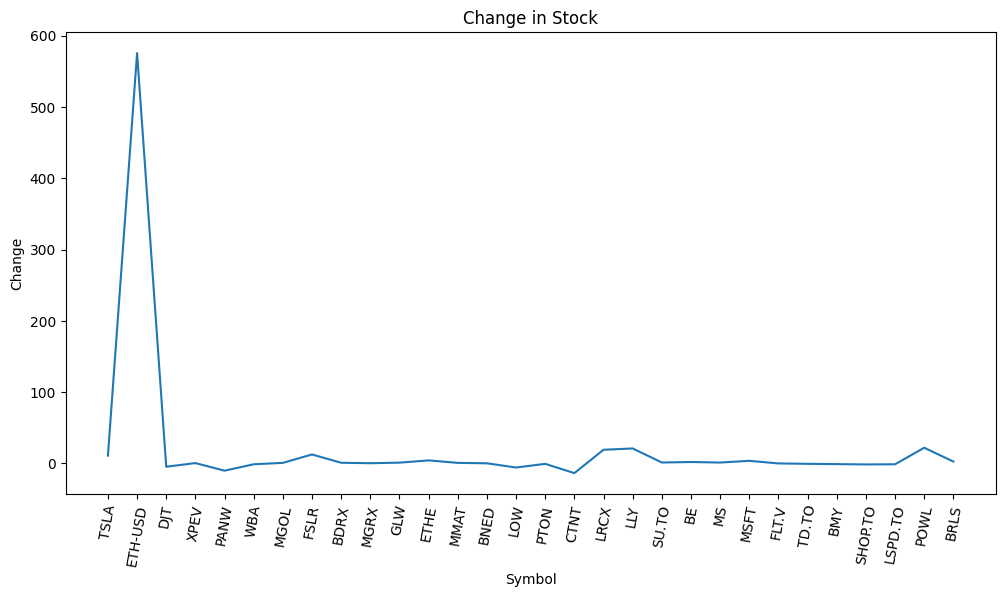

In [61]:
# Scatterplot for Stock Change

plt.figure(figsize=(12, 6))
plt.plot(trending_stocks['Symbol'], trending_stocks['Change'])
plt.xlabel('Symbol')
plt.ylabel('Change')
plt.title('Change in Stock')
plt.xticks(rotation=80)
plt.show()

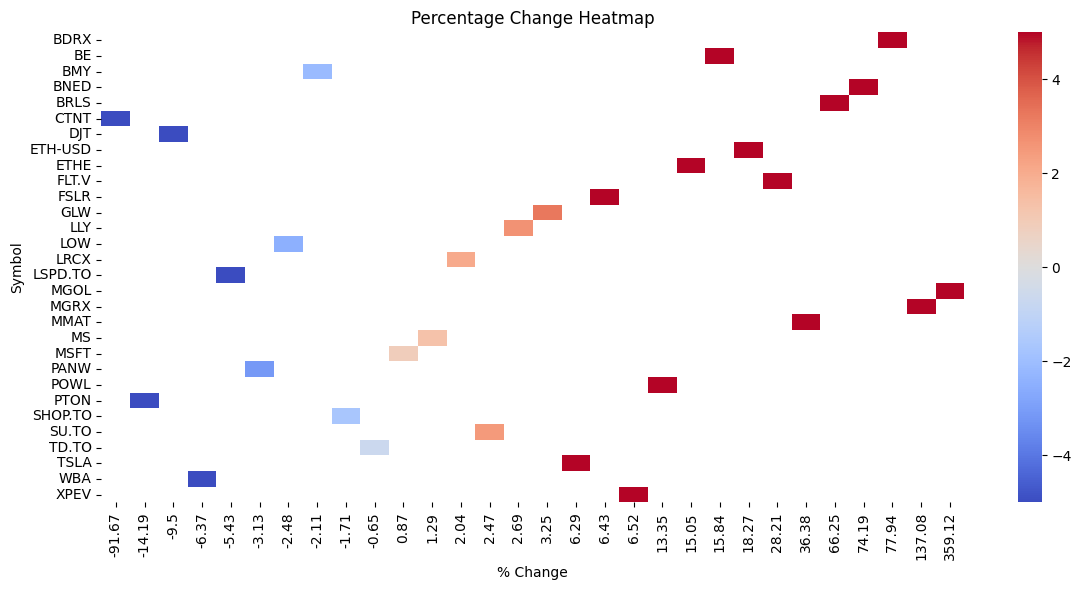

In [60]:
# Percentage change heatmanp

plt.figure(figsize=(12, 6))

perc_change = trending_stocks.groupby('Symbol')['% Change'].mean().reset_index()
symbol_vs_change = perc_change.pivot(index='Symbol', columns='% Change', values='% Change')

sns.heatmap(symbol_vs_change, cmap='coolwarm', vmin=-5, vmax=5)
plt.title('Percentage Change Heatmap')
plt.tight_layout()
plt.show()